<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/4.%20Public%20Health%20and%20Safety/Weather%20Data%20Clustering/Weather_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content:
1. [Preparing Project](#1)
    * 1.1 [Connection to Kaggle](#1.1)
    * 1.2 [Downloading Dataset](#1.2)
    * 1.3 [Import Libraries](#1.3)
    * 1.4 [Import Dataset](#1.4)
2. [Exploring Dataset](#2)
    * 2.1 [Understanding the Variables](#2.1)
    * 2.2 [Unique Values](#2.2)
    * 2.3 [Missing Values](#2.3)
3. [Get Samples](#3)
4. [Exploratory Data Analysis](#4)
    * 4.1 [Distribution](#4.1)
    * 4.2 [Boxplot](#4.2)
    * 4.3 [Sample DataFrame Vs Original DataFrame](#4.3)
        * 4.3.1 [Hypothesis Test](#4.3.1)
        * 4.3.2 [Hypothesis Test Analysis Output](#4.3.2)
5. [Preparing For Model](#5)
    * 5.1 [Feature Scaling](#5.1)
    * 5.2 [Elbow Method to Find Optimal `K`](#5.2)
6. [KMneas Clustering](#6)
7. [Hierarchical Clustering](#7)


[Dataset Link](https://www.kaggle.com/datasets/julianjose/minute-weather)

# 1. Preparing Project <a id=1></a>

## 1.1 Connection to Kaggle <a id=1.1></a>

In [1]:
from google.colab import userdata
import os

os.environ['KAGGLE_PASS'] = userdata.get("KAGGLE_PASS")
os.environ['KAGGLE_USERNAME'] = userdata.get("KAGGLE_USERNAME")

## 1.2 Downloading Dataset <a id=1.2></a>

In [2]:
!kaggle datasets download -d julianjose/minute-weather

Dataset URL: https://www.kaggle.com/datasets/julianjose/minute-weather
License(s): unknown
 99% 26.0M/26.2M [00:00<00:00, 63.0MB/s]
100% 26.2M/26.2M [00:00<00:00, 53.7MB/s]


In [3]:
!unzip /content/minute-weather.zip

Archive:  /content/minute-weather.zip
  inflating: minute_weather.csv      


## 1.3 Import Libraries <a id=1.3></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Import Dataset <a id=1.4></a>

In [5]:
df = pd.read_csv('/content/minute_weather.csv')
df.head(1).T

,0
rowID,0
hpwren_timestamp,2011-09-10 00:00:49
air_pressure,912.3
air_temp,64.76
avg_wind_direction,97.0
avg_wind_speed,1.2
max_wind_direction,106.0
max_wind_speed,1.6
min_wind_direction,85.0
min_wind_speed,1.0


# 2. Exploring Dataset <a id=2></a>

In [6]:
df.shape

(1587257, 13)

In [7]:
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [8]:
df.dtypes

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object

In [9]:
df.duplicated().sum()

0

## 2.1 Understanding the Variables <a id=2.1></a>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rowID               1587257 non-null  int64  
 1   hpwren_timestamp    1587257 non-null  object 
 2   air_pressure        1587257 non-null  float64
 3   air_temp            1587257 non-null  float64
 4   avg_wind_direction  1586824 non-null  float64
 5   avg_wind_speed      1586824 non-null  float64
 6   max_wind_direction  1586824 non-null  float64
 7   max_wind_speed      1586824 non-null  float64
 8   min_wind_direction  1586824 non-null  float64
 9   min_wind_speed      1586824 non-null  float64
 10  rain_accumulation   1587256 non-null  float64
 11  rain_duration       1587256 non-null  float64
 12  relative_humidity   1587257 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


#### DataFrame Variable Descriptions
1. **rowID**
   - **Type**: int64
   - **Description**: A unique identifier for each row in the dataset.

2. **hpwren_timestamp**
   - **Type**: object
   - **Description**: The timestamp when the data was recorded. It is in string format and represents the date and time.

3. **air_pressure**
   - **Type**: float64
   - **Description**: The atmospheric pressure measured at the time of recording, in units of pressure (typically millibars or pascals).

4. **air_temp**
   - **Type**: float64
   - **Description**: The air temperature at the time of recording, measured in degrees Celsius or Fahrenheit.

5. **avg_wind_direction**
   - **Type**: float64
   - **Description**: The average wind direction over a specific period, measured in degrees. Missing values indicate the absence of wind direction data.

6. **avg_wind_speed**
   - **Type**: float64
   - **Description**: The average wind speed over a specific period, measured in units of speed (typically meters per second or kilometers per hour). Missing values indicate the absence of wind speed data.

7. **max_wind_direction**
   - **Type**: float64
   - **Description**: The maximum wind direction observed during the recording period, measured in degrees. Missing values indicate the absence of wind direction data.

8. **max_wind_speed**
   - **Type**: float64
   - **Description**: The maximum wind speed observed during the recording period, measured in units of speed. Missing values indicate the absence of wind speed data.

9. **min_wind_direction**
   - **Type**: float64
   - **Description**: The minimum wind direction observed during the recording period, measured in degrees. Missing values indicate the absence of wind direction data.

10. **min_wind_speed**
    - **Type**: float64
    - **Description**: The minimum wind speed observed during the recording period, measured in units of speed. Missing values indicate the absence of wind speed data.

11. **rain_accumulation**
    - **Type**: float64
    - **Description**: The total amount of rainfall accumulated during the recording period, measured in millimeters or inches.

12. **rain_duration**
    - **Type**: float64
    - **Description**: The total duration of rainfall during the recording period, measured in seconds or minutes.

13. **relative_humidity**
    - **Type**: float64
    - **Description**: The relative humidity at the time of recording, measured as a percentage. It indicates the amount of moisture in the air relative to the maximum amount the air can hold at that temperature.

## 2.2 Unique Values <a id=2.2></a>

In [11]:
pd.DataFrame(df.nunique(), columns=['Unique Values'])

,Unique Values
rowID,1587257
hpwren_timestamp,1554478
air_pressure,246
air_temp,378
avg_wind_direction,360
avg_wind_speed,244
max_wind_direction,360
max_wind_speed,266
min_wind_direction,360
min_wind_speed,222


## 2.3 Missing Values <a id=2.3></a>

In [12]:
df.isna().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [13]:
# Handling Missing value by drop NaN
df = df.dropna()

# 3. Get Samples <a id=3></a>

In [14]:
# Get 10000 samples from df.
df_sample = df.sample(n=10000, random_state=42)

# Display the first few rows of the sample to verify

df_sample = df_sample.reset_index(drop=True)
df_sample.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,1340886,2014-03-23 16:45:30,917.7,58.10,272.0,2.0,283.0,3.0,230.0,0.6,0.0,0.0,66.5
1,1426619,2014-05-22 08:11:18,915.7,50.72,207.0,2.0,216.0,2.3,201.0,1.5,0.0,0.0,82.4
2,1139147,2013-10-18 03:25:48,916.5,63.50,45.0,0.9,57.0,1.2,35.0,0.7,0.0,0.0,24.7
3,539997,2012-08-27 22:04:06,917.2,79.52,12.0,1.8,38.0,2.4,356.0,1.2,0.0,0.0,22.5
4,1139176,2013-10-18 03:54:48,916.4,63.50,9.0,1.3,23.0,1.4,353.0,1.0,0.0,0.0,25.8


In [41]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
rowID,10000.0,798713.179600,458880.591296,32.00,401800.00,805821.00,1194321.50,1587186.00
air_pressure,10000.0,916.817070,3.024544,905.70,914.90,916.70,918.70,929.20
air_temp,10000.0,61.730420,11.981585,32.54,52.34,62.06,70.88,96.44
avg_wind_direction,10000.0,161.326500,95.001611,0.00,61.00,182.00,217.00,359.00
avg_wind_speed,10000.0,2.770570,2.058637,0.00,1.30,2.20,3.80,16.20
max_wind_direction,10000.0,163.965000,92.451908,0.00,68.00,187.00,223.00,359.00
max_wind_speed,10000.0,3.395630,2.411624,0.10,1.60,2.80,4.60,17.60
min_wind_direction,10000.0,166.011500,97.513137,0.00,75.00,180.00,211.00,359.00
min_wind_speed,10000.0,2.138160,1.759719,0.00,0.80,1.60,3.00,15.00
rain_accumulation,10000.0,0.000241,0.005669,0.00,0.00,0.00,0.00,0.44


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rowID,1586823.0,793614.029185,458204.542564,1.00,396794.5,793643.00,1190380.50,1587256.00
air_pressure,1586823.0,916.830248,3.051509,905.00,914.8,916.70,918.70,929.50
air_temp,1586823.0,61.855267,11.832718,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586823.0,161.965420,95.208136,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586823.0,2.774273,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586823.0,163.403084,92.367252,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586823.0,3.399815,2.423168,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586823.0,166.826422,97.462755,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586823.0,2.133131,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1586823.0,0.001855,0.961103,0.00,0.0,0.00,0.00,655.01


# 4. Exploratory Data Analysis <a id=4></a>

## 4.1 Distribution <a id=4.1></a>

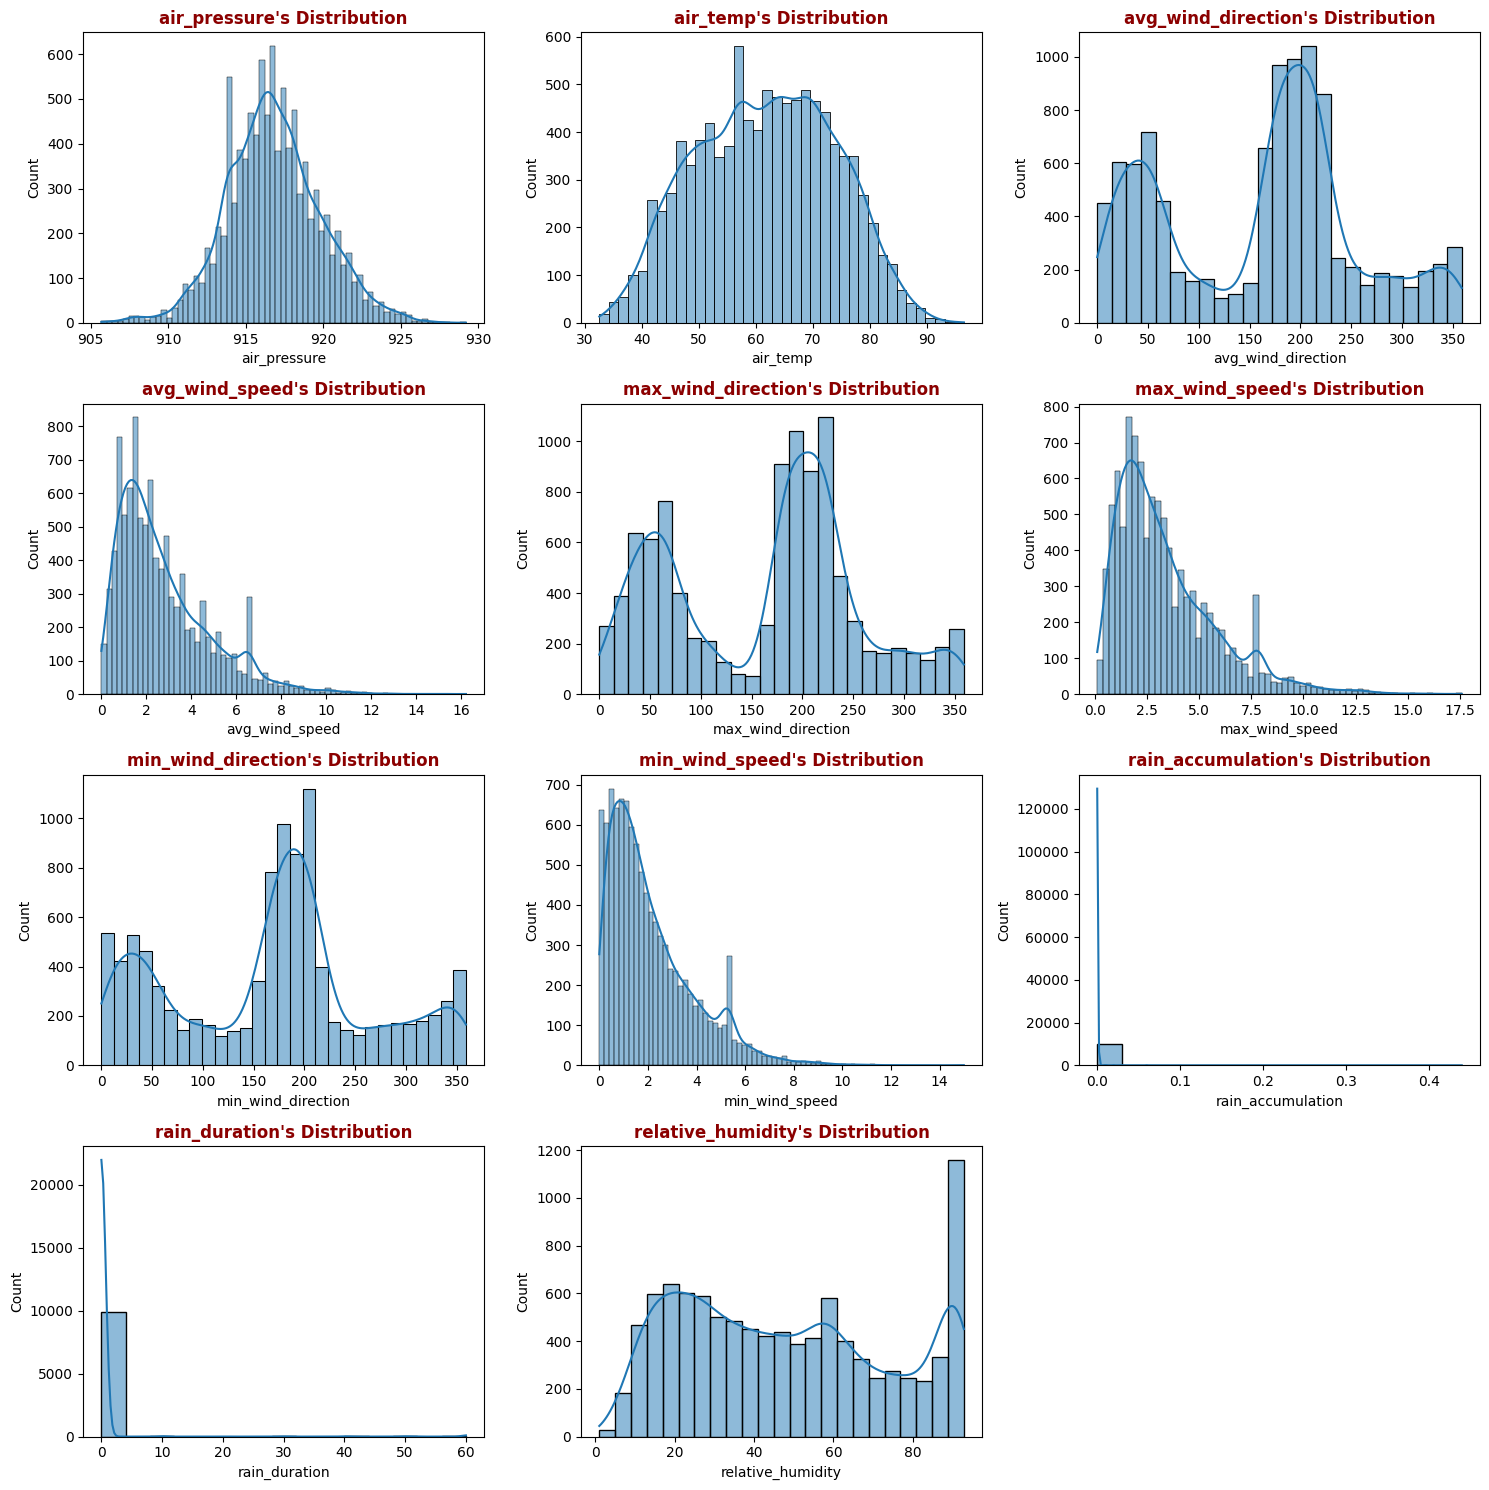

In [22]:
features = ['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity']

plt.figure(figsize=(15, 15))
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_sample[column], kde=True, bins='auto')
    plt.title(f"{column}'s Distribution", fontdict={'color': 'darkred', 'weight':'bold'})
plt.tight_layout()
plt.show()

## 4.2 Boxplot <a id=4.2></a>

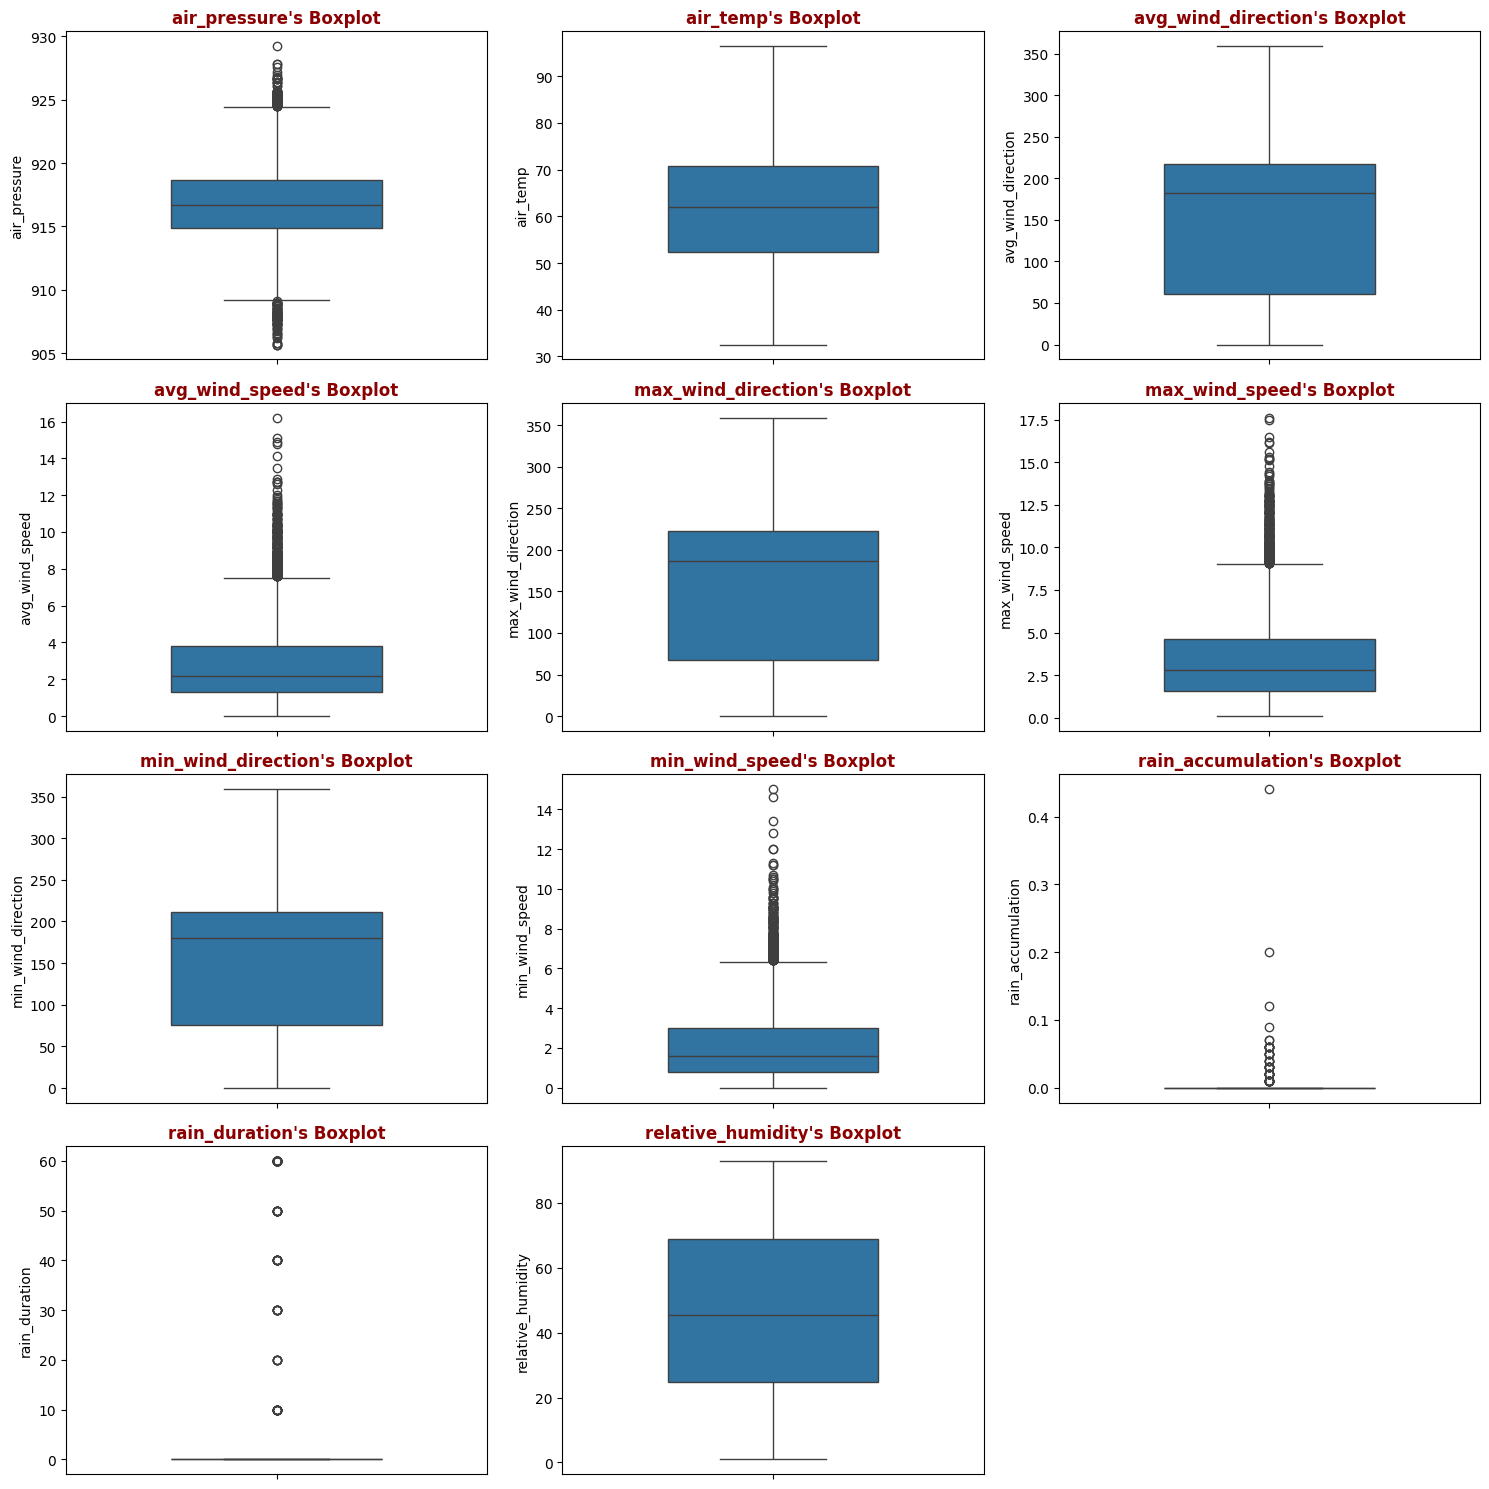

In [20]:
features = ['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity']

plt.figure(figsize=(15, 15))
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df_sample[column], width=0.5)
    plt.title(f"{column}'s Boxplot", fontdict={'color': 'darkred', 'weight':'bold'})
plt.tight_layout()
plt.show()

## 4.3 Sample DataFrame Vs Original DataFrame <a id=4.3></a>

In [26]:
import numpy as np
import scipy.stats as stats

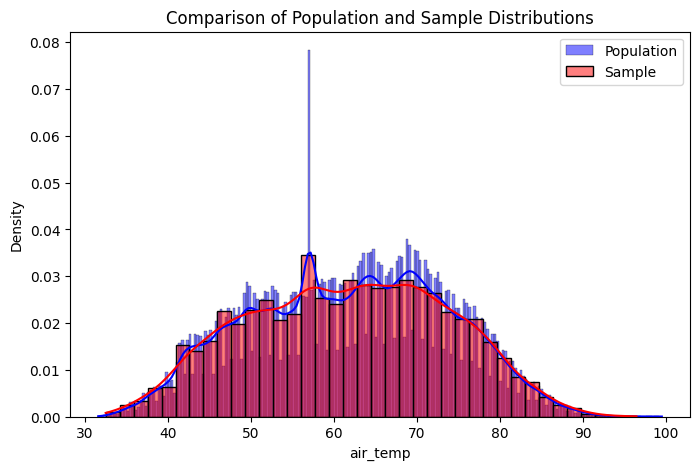

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['air_temp'], kde=True, color='blue', label='Population', stat='density')
sns.histplot(df_sample['air_temp'], kde=True, color='red', label='Sample', stat='density')
plt.legend()
plt.title('Comparison of Population and Sample Distributions')
plt.show()

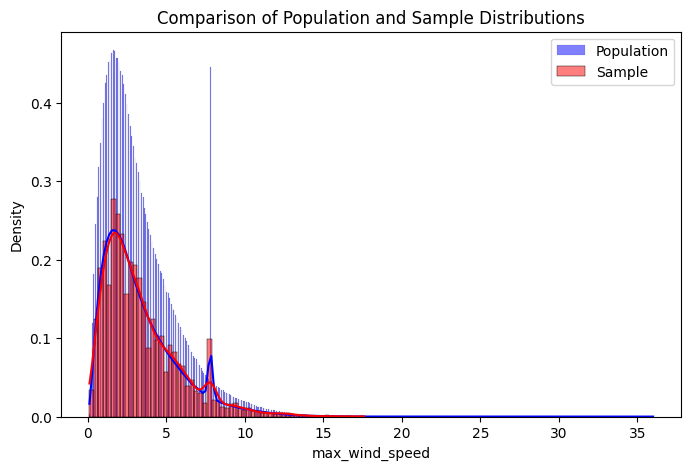

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['max_wind_speed'], kde=True, color='blue', label='Population', stat='density')
sns.histplot(df_sample['max_wind_speed'], kde=True, color='red', label='Sample', stat='density')
plt.legend()
plt.title('Comparison of Population and Sample Distributions')
plt.show()

### 4.3.1 Hypothesis Test <a id=4.3.1></a>

In [36]:
def hypothesis_test_mean_difference(df, df_sample, features):
    results = {}
    for feature in features:
        # Population mean
        population_mean = df[feature].mean()

        # Sample mean and standard deviation
        sample_mean = df_sample[feature].mean()
        sample_std = df_sample[feature].std()
        sample_size = len(df_sample)

        # Perform a one-sample t-test
        t_stat, p_value = stats.ttest_1samp(df_sample[feature], population_mean)

        # Store the results
        results[feature] = {
            'population_mean': population_mean,
            'sample_mean': sample_mean,
            't_statistic': t_stat,
            'p_value': p_value
        }

    return pd.DataFrame(results).T

In [37]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
            'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
            'min_wind_speed', 'rain_accumulation', 'rain_duration',
            'relative_humidity']

# Perform the hypothesis test
results_df = hypothesis_test_mean_difference(df, df_sample, features)

# Display the results
print(results_df)

                    population_mean  sample_mean  t_statistic        p_value
air_pressure             916.830248   916.817070    -0.435706   6.630597e-01
air_temp                  61.855267    61.730420    -1.041991   2.974411e-01
avg_wind_direction       161.965420   161.326500    -0.672536   5.012579e-01
avg_wind_speed             2.774273     2.770570    -0.179879   8.572510e-01
max_wind_direction       163.403084   163.965000     0.607793   5.433388e-01
max_wind_speed             3.399815     3.395630    -0.173515   8.622500e-01
min_wind_direction       166.826422   166.011500    -0.835705   4.033407e-01
min_wind_speed             2.133131     2.138160     0.285775   7.750566e-01
rain_accumulation          0.001855     0.000241   -28.476300  1.429879e-171
rain_duration              0.536059     0.395000    -3.108204   1.887564e-03
relative_humidity         47.596619    48.049750     1.723146   8.489307e-02


### 4.3.2 Hypothesis Test Analysis Output <a id=4.3.2></a>

1. **Non-Significant Differences**:
   - **Air Pressure**: The p-value (0.6630597) is much higher than 0.05, indicating no significant difference between the sample mean and the population mean.
   - **Air Temperature**: The p-value (0.2974411) suggests no significant difference.
   - **Average Wind Direction**: The p-value (0.5012579) indicates no significant difference.
   - **Average Wind Speed**: The p-value (0.8572510) indicates no significant difference.
   - **Maximum Wind Direction**: The p-value (0.5433388) indicates no significant difference.
   - **Maximum Wind Speed**: The p-value (0.8622500) indicates no significant difference.
   - **Minimum Wind Direction**: The p-value (0.4033407) indicates no significant difference.
   - **Minimum Wind Speed**: The p-value (0.7750566) indicates no significant difference.
   - **Relative Humidity**: The p-value (0.08489307) is slightly above 0.05, indicating no significant difference, though it is borderline.

2. **Significant Differences**:
   - **Rain Accumulation**: The p-value (1.429879e-171) is extremely small, indicating a highly significant difference between the sample mean (0.000241) and the population mean (0.001855). This suggests that the sample may not be well-representative for this feature or there might be issues in the sample selection.
   - **Rain Duration**: The p-value (0.001887564) is also below 0.05, indicating a significant difference between the sample mean (0.395000) and the population mean (0.536059).

Most features do not show a significant difference between the sample and population means, suggesting that the sample is reasonably representative for those features. However, **rain_accumulation** and **rain_duration** show significant differences, indicating that the sample may not accurately reflect the population for these features.

# 5. Preparing for Modelling <a id=5></a>

## 5.1 Feature Scaling <a id=5.1></a>

In [52]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
        'max_wind_speed','relative_humidity']

df_model = df_sample[features].copy()
df_model.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,917.7,58.10,272.0,2.0,283.0,3.0,66.5
1,915.7,50.72,207.0,2.0,216.0,2.3,82.4
2,916.5,63.50,45.0,0.9,57.0,1.2,24.7
3,917.2,79.52,12.0,1.8,38.0,2.4,22.5
4,916.4,63.50,9.0,1.3,23.0,1.4,25.8


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_model = scaler.fit_transform(df_model)
df_model

array([[ 0.29193626, -0.30301512,  1.16502271, ...,  1.28759865,
        -0.16405949,  0.7016529 ],
       [-0.36935344, -0.91899111,  0.48078957, ...,  0.56286131,
        -0.45433486,  1.3063212 ],
       [-0.10483756,  0.14769902, -1.22452994, ..., -1.15703776,
        -0.91048188, -0.88797821],
       ...,
       [-0.13790205,  0.59841317,  0.0386697 , ...,  0.20590112,
        -1.28369307, -1.22263739],
       [ 1.84596705, -0.70865785, -1.23505661, ..., -1.17867171,
         3.89979571, -1.34052869],
       [-0.4685469 ,  0.7035798 , -1.02452333, ..., -0.96233221,
        -0.62020651,  0.56094393]])

## 5.2 Elbow Method to Find Optimal `K` <a id=5.2></a>

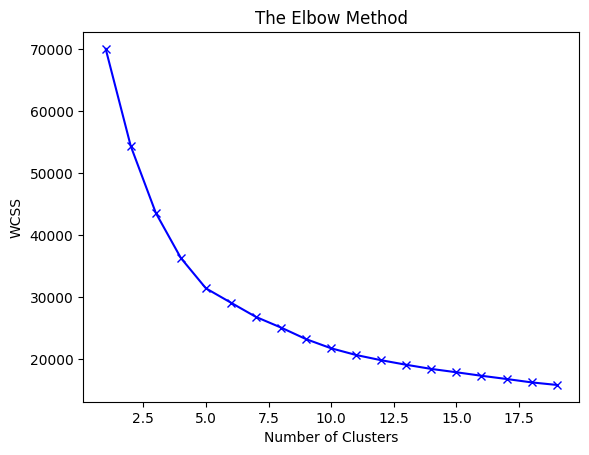

In [54]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    k_means = KMeans(n_clusters=i, init='k-means++')
    k_means.fit(df_model)
    wcss.append(k_means.inertia_)


# Plot
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 6. KMneas Clustering <a id=6></a>

In [67]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
# Fitting Model
y_kmeans = kmeans.fit_predict(df_model)
# Check y_kmeans
y_kmeans

array([0, 0, 4, ..., 1, 3, 5], dtype=int32)

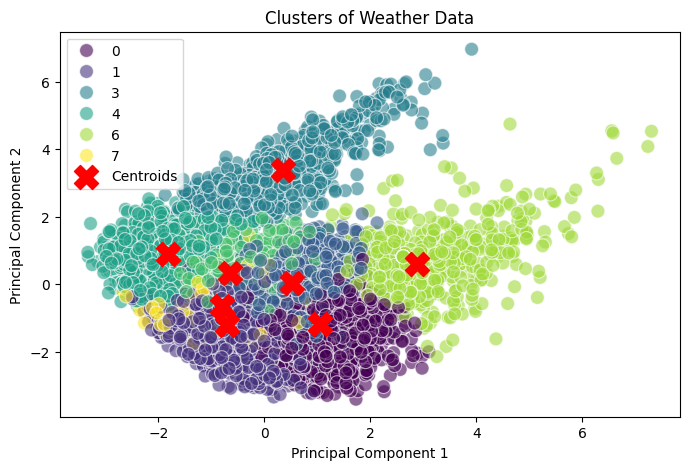

In [68]:
# Use PCA to reduce the feature space to 2 dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_model_pca = pca.fit_transform(df_model)

# Create a dataframe for the PCA results
df_pca = pd.DataFrame(data=df_model_pca, columns=['PCA 1', 'PCA 2'])
df_pca['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.6, edgecolor='w')

# Plot the cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters of Weather Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 7. Hierarchical Clustering <a id=7></a>

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

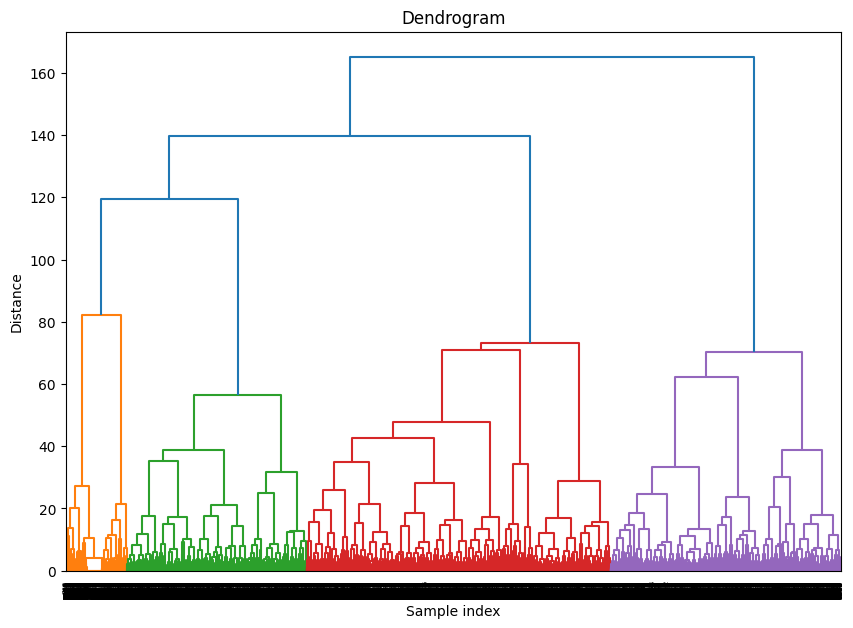

In [62]:
# Perform hierarchical clustering
linked = linkage(df_model, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_model)

In [70]:
y_hc

array([3, 3, 1, ..., 0, 4, 1])

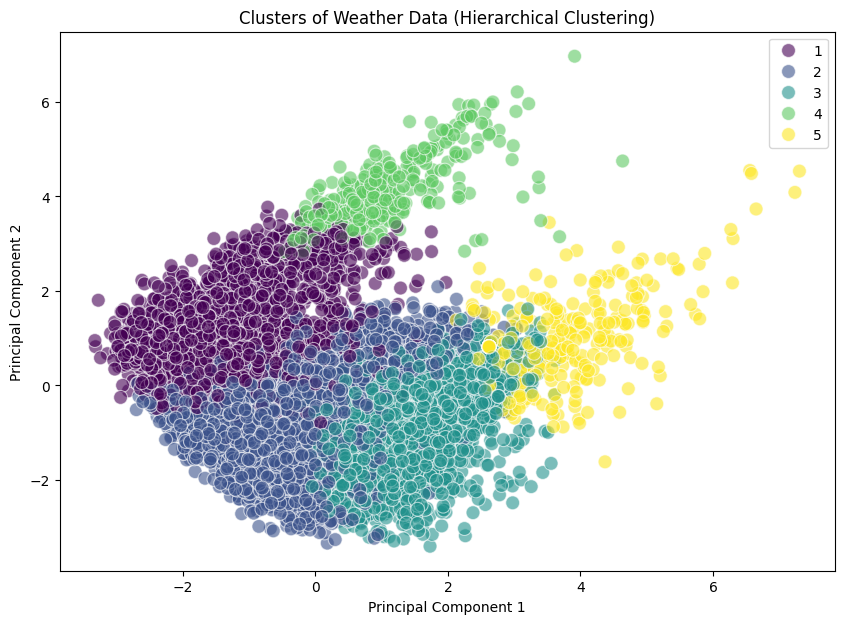

In [74]:
from scipy.cluster.hierarchy import fcluster

# Create clusters
num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Plot clusters in 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_model_pca = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=df_model_pca, columns=['PCA 1', 'PCA 2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Weather Data (Hierarchical Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()